# K-近邻算法KNN
## 算法原理

k-近邻算法KNN，是K-Nearest neighbors Algorithms的简称，是比较简单的机器学习算法之一，它采用测量不同特征值之间的距离方法对事物进行**分类**。

它的**工作原理**是：存在一个样本数据**训练集合**，样本集中每个样本都存在**分类标签**，输入没有标签的**新数据**后，将新数据的每个特征与样本集中数据对应的特征进行比较，如果最近邻的样本中大多数属于某一类别，则该新数据样本也属于这个类别。一般来说，我们只选择样本数据集中前k个最相似的数据，这就是k-近邻算法中k的出处，通常k是不大于20的整数。

k-近邻算法简单、直观、精度高、对异常值不敏感、无数据输入假定。存在的不足是计算复杂度高、空间复杂度高。算法适应的数据范围是数值型和标称型。

输入未知类别的测试数据作为**当前点**，k-近邻算法依次执行以下操作：

    (1)计算已知类别数据集中的点与当前点之间的距离；
    (2)按照距离递增次序排序；
    (3)选取与当前点距离最小的k个点；
    (4)确定前k个点所在类别的出现频率；
    (5)返回前k个点出现频率最高的类别作为当前点的预测类别。

计算测试数据到训练数据之间的距离，如设置 k 为 3，找到距离测试数据最近（最小）的三个点，假如 3 个点中有 2 个属于A类，1 个属于B类，那么把测试数据输出为A类。这种通过计算距离得到 k 个最邻近的类，按照”**少数服从多数**“原则分类的算法就为 KNN算法的大致思路。

举个例子，海伦小姐是一个大龄单身女青年，她一直通过网络寻找适合自己的另一半。她欣赏的约会对象主要有三个方面的因素：月收入、颜值、每周跑步的公里数，抽象为三个方面的数据特征：每年飞行里程数、玩游戏的时间比和每周消耗冰淇淋公升数。对于每个样本，分类为：**不喜欢（didntLike）、魅力一般（smallDoses）和极具魅力（largeDoses）**三种。她将这些数据保存在文本文件**datingTestSet.txt**中。下面的表格展示了10个样本，每个样本都有对应的标签。对于未知标签的数据，如（50242，3.723498，0.831917），应该怎么分类呢？下面将介绍使用K-近邻算法进行分类。

|每年飞行里程|玩游戏时间比|每周冰淇淋公升数|分类（标签）|
|:---|:---|:---|:---:|
|40920|8.326976|0.953952|largeDoses|
|14488|7.153469|1.673904|smallDoses|
|26052|1.441871|0.805124|didntLike|
|75136|13.147394|0.428964|didntLike|
|38344|1.669788|0.134296|didntLike|
|72993|10.141740|1.032955|didntLike|
|35948|6.830792|1.213192|largeDoses|
|42666|13.276369|0.543880|largeDoses|
|67497|8.631577|0.749278|didntLike|
|35483|12.273169|1.508053|largeDoses|


## 距离计算

数据集中的两个样本的距离有多种计算方法，如引言中的欧氏距离、余弦相似度、曼哈顿距离等，这里使用欧式距离。设二维空间中的两个点$A(a_0,a_1)$、$B(b_0,b_1)$，其**欧式距离**$d$为$$d= \sqrt[2]{(a_0-b_0)^2+(a_1-b_1)^2}$$若是$n$维空间中的两个点$A(a_0,a_1,\cdots,a_{n-1})$、$B(b_0,b_1,\cdots,b_{n-1})$，其欧式距离$d$为$$d= \sqrt[2]{(a_0-b_0)^2+(a_1-b_1)^2+\cdots+(a_{n-1}-b_{n-1})^2}$$

## k值选择
K值选择问题，会对结果产生重大影响。

选择较小的K值，就相当于用较小的领域中的训练实例进行预测，“学习”近似误差会减小，只有与输入实例较近或相似的训练实例才会对预测结果起作用，与此同时带来的问题是“学习”的估计误差会增大，预测结果会对邻近实例点非常敏感，如果邻近的实例点恰好是噪声，预测就会出错，换句话说，K值的减小就意味着整体模型变得复杂，**容易发生过拟合**。

选择较大的K值，就相当于用较大领域中的训练实例进行预测，其优点是可以减少学习的估计误差，但缺点是学习的近似误差会增大。这时候，与输入实例较远（不相似的）训练实例也会对预测器作用，使预测发生错误，且K值的增大就意味着整体的模型变得简单。

如果K=N（N为训练样本个数），则完全不足取，因为此时无论输入实例是什么，都只是简单的预测它属于在训练实例中最多的类，模型过于简单，忽略了训练实例中大量有用信息。

在实际应用中，K值一般取一个比较小的数值，例如采用交叉验证法（简单来说，就是把训练数据在分成两组:训练集和验证集）来选择最优的K值。

## Python KNN实现
### 读取数据

收集的数据已经保存在文本文件**datingTestSet.txt**中，有1000个样本。首先要将待处理数据的格式改变为分类器可以接受的格式。创建名为**file2matrix()**的函数，来处理输入格式问题。该函数的输入为文件名字符串，输出为训练样本矩阵和类标签向量。

np.loadtxt()用于从文本加载数据。文本文件中的每一行必须含有相同的数据。函数原型为：

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, onverters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    
    •fname要读取的文件、文件名、或生成器。
    • dtype数据类型，默认float。
    • comments注释。
    • delimiter分隔符，默认是空格。
    • skiprows跳过前几行读取，默认是0，必须是int整型。
    • usecols：要读取哪些列，0是第一列。例如，usecols = （1,4,5）将提取第2，第5和第6列。默认读取所有列。
    • unpack如果为True，将分列读取。


In [71]:
import numpy as np
#在下面添加此代码以显示单元格中的所有输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

labelDigit = {'didntLike': '1', 'smallDoses': '2', 'largeDoses': '3'}#字典
def file2matrix(filename):
    data=np.loadtxt(filename,usecols=(0,1,2),dtype=np.float32,delimiter="\t")
    labelStr=np.loadtxt(filename,usecols=3,dtype=np.str,delimiter="\t")
    label = []#列表，训练样本标签
    for lstr in labelStr:
        #字典的get() 函数返回指定键的值，如果值不在字典中返回默认值（第2个lstr），如''。
        label.append(int(labelDigit.get(lstr,lstr)))#转换为数字标签，注意datingTestSet2.txt文件的最后一列已经是数字
    return data,np.array(label).transpose()

datingData,datingLabel=file2matrix("./DataSet/datingTestSet.txt")
datingData.shape,datingLabel.shape

((1000, 3), (1000,))

**说明：**数据文件使用tab字符\t分割数据。返回的结果为两个矩阵，具有相同的行数，表示数据和标签。

### 分析数据

Matplotlib是Python的一个2D图形库，能够生成各种格式的图形（诸如折线图、散点图、柱状图、饼图、直方图、子图等等），界面可交互（可以利用鼠标对生成图形进行点击操作），同时该2D图形库跨平台，即既可以在Python脚本中编码操作，也可以在Jupyter Notebook中使用，以及其他平台都可以很方便的使用Matplotlib图形库，而且生成图形质量较高，甚至可以达到出版级别。需要注意的是，在相关Python软件中调用Matplotlib图形库时，需要利用shell进行单独安装，假如使用Jupyter Notebook时，相关图形库已直接配置在软件内，不过其生成的图形**无法进行交互**，而是内嵌在Jupyter Notebook生成界面内。

matplotlib提供面向对象绘图库的一个接口，它的语法和matlab十分相似。也就是说，它主要的绘图命令和matlab对应的命令有相似的参数。如果没有安装模块，可以使用**conda install matplotlib命令安装**，也可以使用conda update matplotlib更新到最新的matplotlib模块。

针对本示例，定义了一个绘图函数drawFig，函数参数为样本矩阵datingDataMat和标签数组datingLabels。

In [72]:
def drawFig(datingDataMat,datingLabels):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(datingDataMat[:,0], datingDataMat[:, 1],
               15.0*np.array(datingLabels), 15.0*np.array(datingLabels))#颜色和大小？
    plt.show()

matplotlib.pyplot 包下的scatter函数绘制散列点。由于是2D绘图，使用了datingDataMat样本中的**第0、1列数据**。下列代码显示了样本数据第0、1列的散列，运行结果比较清晰地分类出了样本。一般而言，这样的数据分析为设计分类模型提供了一种依据。

如果使用样本中的第1、2列数据，是否能从图中看出样本的清晰分类？（结论：不会很清晰）

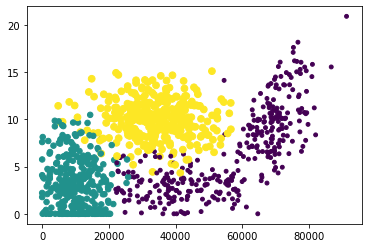

In [73]:
import numpy as np
import matplotlib.pyplot as plt
datingDataMat,datingLabels=file2matrix("./DataSet/datingTestSet.txt")
#print(datingDataMat)
drawFig(datingDataMat,datingLabels)

### 准备数据：归一化数值
因为每年里程数值和其他两个特征相比大很多，因此对于计算距离的影响远大于其他两个特征。但是在海伦看来这三个特征应该是**等权重**的，里程数值不应该如此严重地影响到计算结果。

因此我们需要进行数值归一化。采用公式$newValue = \frac{oldValue-min}{max-min}$可以将任意取值范围的特征值转化为**0到1的区间**。其中min和max分别是数据集中最小特征值和最大特征值。这种方法也叫最大最小归一化。

In [74]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)    #参数0可以从选取每一列的最小值组成向量，按列求最小
    maxVals = dataSet.max(0)    #按求最大
    ranges = maxVals - minVals  #求分母
    #print(minVals,maxVals,ranges)
    newdataSet=(dataSet-minVals)/ranges
    return newdataSet
normMat=autoNorm(datingDataMat)
normMat

array([[0.44832537, 0.39805138, 0.5623336 ],
       [0.1587326 , 0.34195465, 0.9872441 ],
       [0.28542942, 0.06892523, 0.4744963 ],
       ...,
       [0.29115948, 0.5091029 , 0.51079494],
       [0.527111  , 0.4366545 , 0.42900482],
       [0.47940794, 0.37680906, 0.7857181 ]], dtype=float32)

归一化过程中，可以使用Numpy的 tile() 函数，就是将原矩阵横向、纵向地复制。也可以对数组操作，比如tile(A,n)，功能是将数组A重复n次，构成一个新的数组。

### 分类器设计
按照KNN算法的5个操作步骤，设计代码如下，函数有**4个输入参数**，依次是：未知分类的输入向量，训练样本集，训练样本的标签，以及最近邻居的数目k。

In [75]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]  # shape[0]表示矩阵有多少行 shape[1]表示矩阵有多少列
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet  # 计算Ai-Bi
    sqDiffMat = diffMat**2  #计算(Ai-Bi)^2
    sqDistances = sqDiffMat.sum(axis=1) # 计算(A0-B0)^2+...+(Ai-Bi)^2
    distances = sqDistances**0.5    # 计算((A0-B0)^2+...+(Ai-Bi)^2)^0.5 也就是欧式距离
    sortedDistIndicies = distances.argsort()    # 得到数组的值按递增排序的索引
    classCount = {}
    for i in range (k): #距离最近的k个点
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0)+1    # 如果voteIlabels的key不存在就返回0
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

### 测试算法：作为完整程序验证分类器
在datingTestSet2.txt数据集中选取10%的数据作为测试数据。

In [76]:
def datingClassTest():
    hoRatio = 0.10  # 10%的数据作为测试集
    datingDataMat, datingLabels = file2matrix("./DataSet/datingTestSet2.txt")  # load data setfrom file
    normMat = autoNorm(datingDataMat)
    #print( minVals)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import operator
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

错误率仅为5%左右，基本上可以正确的分类。

## Scikit-Learn KNN实现

**scikit-learn（简称sklearn）**是目前最受欢迎，也是功能最强大的一个用于机器学习的Python库件。它广泛地支持各种分类、聚类以及回归分析方法比如支持向量机、随机森林、DBSCAN等等，还有一些特征提取（extracting features）、数据处理（processing data）和模型评估（evaluating models）的模块。由于其强大的功能、优异的拓展性以及易用性，目前受到了很多数据科学从业者的欢迎，也是业界相当著名的一个开源项目之一。

由于sklearn基于Numpy和Scipy这两个库，要首先安装好它们，可以使用pip或conda来安装或更新sklearn模块。安装好sklearn之后，我们便可以在Python脚本中使用来自sklearn中的各种数据、功能函数等等。

### sklearn内置鸢尾花数据集
数据是机器学习的关键，在机器学习工作中我们需要花费大量的时间来采集和整理数据，合理且科学的数据是得到良好机器学习效果的关键。一般而言，一个分类问题的机器学习过程需要用到**四块数据**内容，分别是：

**训练数据**，一般用train来表示；

**训练数据的分类属性**，一般用target来表示；

**测试数据**，一般用test来表示；

**测试数据的真实分类属性**，用于评估分类器性能，一般用expected来表示；

为了方便学习和测试机器学习中的各种内容，**sklearn内置了各种有用的数据集**，文本处理、图像识别等具有代表性的问题的数据在sklearn中均有收集(对于初学者来说，不得不说很人性化)。本文中用的鸢尾花数据集同样可以在sklearn中的datasets模块中找到。

鸢尾花数据集主要包含了鸢尾花的**4个特征：**

    Sepal Length（花萼长度）
    Sepal Width（花萼宽度）
    Petal Length（花瓣长度）
    Petal Width（花瓣宽度），

以及鸢尾花卉属于Setosa，Versicolour，Virginica（山鸢尾，虹膜锦葵，变色鸢尾）**三个种类**中的哪一类,种类分别用0、1、2作为标签。

鸢尾花数据集通过**sklearn.datasets.load_iris()**加载，并返回鸢尾花数据集。数据集有150行数据，包括三个相关鸢尾花种类的各50个样品。 iris.data存储特征数据，iris.target存储分类标签。运行的结果显示了前5个样本特征数据和150样本对应的标签。

数据操作如下：

In [78]:
from sklearn.datasets import load_iris 
iris = load_iris()
iris_data = iris.data # 鸢尾花特征值(4个)
iris_target = iris.target # 鸢尾花目标值(类别，或标签)
print('iris_data:\n',iris_data[0:5])
print('iris_target:\n',iris_target) 


iris_data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
iris_target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 数值归一化
每个特征的大小，取值范围等不一样，这样会导致每个特征的**权重**不一样，若权重是一样的则要归一化处理。这里，通过对原始数据进行变换，把数据变换到**均值为0,方差为1**范围内。这样每个特征值的权重变得一样，以便于计算机处理。

In [79]:
from sklearn.preprocessing import StandardScaler
##生成 StandardScaler()对象，然后调用transform()方法
std = StandardScaler()#作用：均值和方差归一化。且是针对每一个特征维度
iris_data = std.fit_transform(iris_data)
#iris_target = std.transform(iris_target)
print('iris_data:\n',iris_data[0:5])
print('iris_target:\n',iris_target) 

iris_data:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
iris_target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


依然显示了样本归一化后的前5个样本和所有数据的标签。

### 交叉验证
鸢尾花数据集的样本都有标签，为了重复使用数据，可以把数据集进行切分，将切分的数据集组合为训练集与测试集，在此基础上反复地训练、测试以及模型选择。常用的方法有三种。

1）**简单交叉验证**：首先随机将已给数据分为两部分，一部分作为训练集，另一部分作为测试集，然后用训练集在各种条件下训练模型，从而得到不同的模型，在测试集上评价各个模型的测试误差，选出测试误差最小的模型。

2）**S折交叉验证**：应用最多。首先随机将数据集切分为S个互不相交、大小相同的子集；然后利用S-1个子集的数据训练模型，利用余下的子集测试模型；将这一过程对可能的S种选择重复进行；最后选出S次测评中平均测试误差最小的模型。

3）**留一交叉验证**：S折交叉验证的特殊情形是：S=N，称为留一交叉验证，往往在数据缺乏的情况下使用，N为给定数据集的容量。

下面代码将数据集分为训练集和测试集。

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.25)

**train_test_split()函数**是sklearn模块自带的函数，用于数据分割。

返回值的含义：

x_train为训练集特征值

x_test为测试集特征值

y_train为训练集目标值（huo 标签）

y_test为测试集目标值

test_size=0.25表示25%的数据用于测试

### 相关函数和参数
要使用sklearnKNN算法进行分类，我们需要先了解sklearnKNN算法的一些基本参数。KNeighborsClassifier是一个类，它集成了其他的NeighborsBase, KNeighborsMixin,SupervisedIntegerMixin, ClassifierMixin。下面是一个调用例子：

def **KNeighborsClassifier**(n_neighbors = 5, weights='uniform', algorithm = '', leaf_size = '30', p = 2, metric = 'minkowski', metric_params = None, n_jobs = None )

**n_neighbors**：这个值就是指 KNN 中的 “K”，通过调整 K 值，算法会有不同的效果。

**weights（权重）**：最普遍的 KNN 算法将距离视为等权重。参数weight可以指定如何为距离分配权重。参数选项如下：

  • 'uniform'：不管远近权重都一样，就是最普通的 KNN 算法的形式。  
  • 'distance'：权重和距离成反比，距离预测目标越近具有越高的权重。  
  • 自定义函数：自定义一个函数，根据输入的坐标值返回对应的权重，达到自定义权重的目的。
  
**algorithm**：在 sklearn 中，要构建 KNN 模型有三种构建方式，
  1. 暴力法或蛮力实现，就是直接计算距离存储比较。
  2. 使用 kd 树构建 KNN 模型。 
  3. 使用球树构建。 
  
  其中暴力法适合数据较小的方式，否则效率会比较低。如果数据量比较大一般会选择用 KD 树构建 KNN 模型，而当 KD 树也比较慢的时候，则可以试试球树来构建 KNN。参数选项如下：

  • 'brute' ：蛮力实现  
  • 'kd_tree'：KD 树实现 KNN  
  • 'ball_tree'：球树实现 KNN   
  • 'auto'： 默认参数，自动选择合适的方法构建模型
  
不过当数据较小或比较稀疏时，无论选择哪个最后都会使用 'brute'。

**leaf_size**：如果是选择蛮力实现，这个值是可以忽略的。当使用KD树或球树，它就是停止建子树的叶子节点数量的阈值。默认30，但如果数据量增多这个参数需要增大，否则速度过慢不说，还容易过拟合。

**p**：和metric结合使用的，当metric参数是"minkowski"的时候，p=1为曼哈顿距离， p=2为欧式距离。默认为p=2。

**metric**：指定距离度量方法，一般都是使用欧式距离。

  • 'euclidean' ：欧式距离  
  • 'manhattan'：曼哈顿距离  
  • 'chebyshev'：切比雪夫距离  
  • 'minkowski'： 闵可夫斯基距离，默认参数
  
**n_jobs**：指定多少个CPU进行运算，默认是-1，也就是全部都算。

其它主要函数有：

**fit()**，训练函数，它是最主要的函数。接收参数只有1个，就是训练数据集，每一行是一个样本，每一列是一个属性。它返回对象本身，即只是修改对象内部属性，因此直接调用就可以了。

**predict()**，预测函数。接收测试样本，如果每个样本只有一个输出，则输出为一个一维数组。如果每个样本的输出是多维的，则输出二维数组，每一行是一个样本，每一列是一维输出。

**score()**，计算准确率的函数，接受参数有3个：测试样本，预测样本的真实标签，权重。输出为一个float型数，表示准确率。

更多函数使用方法，请参考其他资料。

### 鸢尾花数据分析
使用sklearn自带的鸢尾花数据集，通过Matplotlib模块分析数据特点。运行结果中数据是归一化后的数据，分类比较明显，蓝色点为待分类数据。

Text(0.5, 1.0, '红色点标签为0,绿色点标签为1，待预测的点为蓝色')

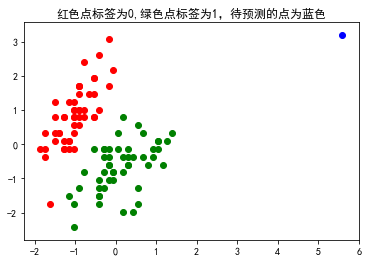

In [82]:
#import numpy as np
import matplotlib.pyplot as plt
#0列为x轴，1列为y轴.iris_target为筛选
plt.scatter(iris_data[iris_target==0,0],iris_data[iris_target==0,1],color='red')
plt.scatter(iris_data[iris_target==1,0],iris_data[iris_target==1,1],color='green')
plt.scatter(5.6,3.2,color='blue')#待测试数据
#x_1=np.array([5.6,3.2])
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('红色点标签为0,绿色点标签为1，待预测的点为蓝色')

### 鸢尾花示例
使用sklearn自带的鸢尾花数据集，通过SciKit-Learn模块的kNN算法实现对鸢尾花的分类。

In [83]:
from sklearn.neighbors import KNeighborsClassifier
  
# 声明模型
knn = KNeighborsClassifier(n_neighbors=5) # 创建一个KNN算法实例，n_neighbors默认为5
# 训练模型
knn.fit(x_train, y_train) # 将训练集送入算法
# 评价模型
accuracy = knn.score(x_test,y_test)
print('模型准确率为：{:.2f}'.format(accuracy * 100))
y_predict = knn.predict(x_test) # 获取预测结果
index = np.arange(0,len(y_test))
print("预测不准确的位置：",index[y_test!=y_predict])


KNeighborsClassifier()

模型准确率为：94.74
预测不准确的位置： [0 4]


到此，完成了鸢尾花的识别。


## 约会网站Scikit-learn实现

类似鸢尾花分类识别，用Scikit-Learn模块实现约会网站。

In [85]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier #导入sklearn的相应的模块
import matplotlib.pyplot as plt 
#读文件中的数据
#约会网站测试数据的分别表示1.每年飞行的里程数，2.玩游戏和看视频占的时间的比，3.每周消费冰淇淋的公升数
#样本标签中1表示不喜欢，2表示魅力一般，3表示极具魅力
datingDataMat, datingLabels = file2matrix("./DataSet/datingTestSet2.txt")

#样本标签中1表示不喜欢，2表示魅力一般，3表示极具魅力

x=np.array([56054,3.574967,0.494666])#测试数据 

kNN_classifier=KNeighborsClassifier(n_neighbors=3) #括号中的3表示k的值
kNN_classifier.fit(datingDataMat,datingLabels)  #传入训练数据进行拟合
x_predict=x.reshape(1,-1)#未分类数据。对测试的数据先进行修改格式，改为1行，-1表示列自动匹配
result_predict=kNN_classifier.predict(x_predict) #传入测试测试数据，对结果进行进行预测
print("测试后结果标签",result_predict[0])

KNeighborsClassifier(n_neighbors=3)

测试后结果标签 1


与单纯的（手工的）Python相比，Scikit-learn模块实现分类预测的代码更加简洁，原因在于复杂的计算都包含的模块中。代码中没有实现归一化、交叉验证和建立评价模型，课后可以去验证。

# k近邻实现：kd树
实现k近邻法时，主要考虑的问题是如何对训练数据进行快速k近邻搜索，这点在特征空间的维数大以及训练数据容量大时尤其重要。

k近邻法的最简单实现是线性扫描，这时要计算输入实例与每一个训练实例的距离，当训练集很大时，计算非常耗时，这种方法是不可行的。为了提高k近邻搜索的效率，可以考虑使用**特殊的结构存储训练数据**，以减少计算距离的次数。具体方法有很多，这里介绍kd树方法。

## 构造kd树

kd树是一种对k维空间中的实例点进行存储以便对其进行快速搜索的树形数据结构。kd树是二叉树，表示对k维空间的一个划分。构造kd树相当于不断地用垂直于坐标轴的超平面将k维空间进行切分，构成一系列的k维超矩形区域。kd树的每一个节点对应于一个k维超矩形区域。kd树是一个二叉树，每个节点表示一个空间范围。

**构造kd树的方法**：构造根节点，使根节点对应于k维空间中包含所有实例点的超矩形区域；通过递归不断对k维空间进行切分，生成子节点。在超矩形区域（节点）选择一个坐标轴和此坐标轴上的一个切分点，确定一个超平面，这个超平面通过给定的切分点并垂直于选定的坐标轴，将当前超矩形切分为左右两个子区域（子节点）。这个过程直到子区域内没有实例为止。在此过程中，将实例保存在相应的节点上。

通常，**依次选择坐标轴**对空间进行划分，选择训练实例在选定坐标轴上的**中位数**为切分点，这样得到的kd树使平衡的。

例子:对于二维空间中的数据集，T={(2,3),(5,4),(9,6),(4,7),(8,1),(7,2)} 构造一个平衡kd树。

（1）根节点包含对应数据集T的矩形
（2）选择x轴，6个数据点，中位数是7。以平面$x^{(1)}=7$将空间划分为左右两个子矩形（子节点）
（3）左矩形包含4个数据点，以$x^{(2)}=4$分为两个矩形；右边包含两个节点，以$x^{(2)}=6$分为2个矩形。
（4）如此递归，得到下面的特征空间划分和kd树![jupyter](./img/knn-1.png)![jupyter](./img/knn-2.png)

## 搜索kd树
有了kd树，可以是用来搜索与查询点最近的节点。利用kd二叉树可以省去对大部分节点的搜索，从而减少搜索的计算量。![jupyter](./img/knn-3.png)


图中星号表示要查询的点**（2.1,3.1）**。通过二叉搜索，顺着搜索路径很快就能找到最邻近的近似点，也就是叶子节点（2,3）。而找到的叶子节点并不一定就是最邻近的，最邻近肯定距离查询点更近，应该位于以查询点为圆心且通过叶子节点的圆域内。

为了找到真正的最近邻，还需要进行**'回溯'操作：算法沿搜索路径反向查找是否有距离查询点更近的数据点**。此例中先从（7,2）点开始进行二叉查找，然后到达（5,4），最后到达（2,3），此时搜索路径中的节点为小于（7,2）和（5,4），大于（2,3），首先以（2,3）作为当前最近邻点，计算其到查询点（2.1,3.1）的距离为0.1414，然后回溯到其父节点（5,4），并判断在该父节点的其他子节点空间中是否有距离查询点更近的数据点。以（2.1,3.1）为圆心，以0.1414为半径画圆，如下图所示。发现该圆并不和超平面y= 4交割，因此不用进入（5,4）节点右子空间中去搜索。

再回溯到（7,2），以（2.1,3.1）为圆心，以0.1414为半径的圆更不会与x = 7超平面交割，因此不用进入（7,2）右子空间进行查找。至此，搜索路径中的节点已经全部回溯完，结束整个搜索，返回最近邻点（2,3），最近距离为0.1414。

## sklearn实现

In [ ]:
import numpy as np
from sklearn.neighbors import KDTree

if __name__ == '__main__':
    x = np.array([[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]])
    tree = KDTree(x,leaf_size=2)
    dist,ind = tree.query(np.array([[2,5]]),k=5)
    print(ind)
    print(dist)

In [ ]:
# -*- coding: utf-8 -*-l
import random
from copy import deepcopy
from time import time

import numpy as np
from numpy.linalg import norm
from collections import Counter

Counter([0, 1, 1, 2, 2, 3, 3, 4, 3, 3]).most_common(1)

def partition_sort(arr, k, key=lambda x: x):
    """
    以枢纽(位置k)为中心将数组划分为两部分, 枢纽左侧的元素不大于枢纽右侧的元素

    :param arr: 待划分数组
    :param p: 枢纽前部元素个数
    :param key: 比较方式
    :return: None
    """
    start, end = 0, len(arr) - 1
    assert 0 <= k <= end
    while True:
        i, j, pivot = start, end, deepcopy(arr[start])
        while i < j:
            # 从右向左查找较小元素
            while i < j and key(pivot) <= key(arr[j]):
                j -= 1
            if i == j: break
            arr[i] = arr[j]
            i += 1
            # 从左向右查找较大元素
            while i < j and key(arr[i]) <= key(pivot):
                i += 1
            if i == j: break
            arr[j] = arr[i]
            j -= 1
        arr[i] = pivot

        if i == k:
            return
        elif i < k:
            start = i + 1
        else:
            end = i - 1


def max_heapreplace(heap, new_node, key=lambda x: x[1]):
    """
    大根堆替换堆顶元素
    :param heap: 大根堆/列表
    :param new_node: 新节点
    :return: None
    """
    heap[0] = new_node
    root, child = 0, 1
    end = len(heap) - 1
    while child <= end:
        if child < end and key(heap[child]) < key(heap[child + 1]):
            child += 1
        if key(heap[child]) <= key(new_node):
            break
        heap[root] = heap[child]
        root, child = child, 2 * child + 1
    heap[root] = new_node


def max_heappush(heap, new_node, key=lambda x: x[1]):
    """
    大根堆插入元素
    :param heap: 大根堆/列表
    :param new_node: 新节点
    :return: None
    """
    heap.append(new_node)
    pos = len(heap) - 1
    while 0 < pos:
        parent_pos = pos - 1 >> 1
        if key(new_node) <= key(heap[parent_pos]):
            break
        heap[pos] = heap[parent_pos]
        pos = parent_pos
    heap[pos] = new_node


class KDNode(object):
    """kd树节点"""

    def __init__(self, data=None, label=None, left=None, right=None, axis=None, parent=None):
        """
        构造函数

        :param data: 数据
        :param label: 数据标签
        :param left: 左孩子节点
        :param right: 右孩子节点
        :param axis: 分割轴
        :param parent: 父节点
        """
        self.data = data
        self.label = label
        self.left = left
        self.right = right
        self.axis = axis
        self.parent = parent


class KDTree(object):
    """kd树"""

    def __init__(self, X, y=None):
        """
        构造函数

        :param X: 输入特征集, n_samples*n_features
        :param y: 输入标签集, 1*n_samples
        """
        self.root = None
        self.y_valid = False if y is None else True
        self.create(X, y)

    def create(self, X, y=None):
        """
        构建kd树

        :param X: 输入特征集, n_samples*n_features
        :param y: 输入标签集, 1*n_samples
        :return: KDNode
        """

        def create_(X, axis, parent=None):
            """
            递归生成kd树

            :param X: 合并标签后输入集
            :param axis: 切分轴
            :param parent: 父节点
            :return: KDNode
            """
            n_samples = np.shape(X)[0]
            if n_samples == 0:
                return None
            mid = n_samples >> 1
            partition_sort(X, mid, key=lambda x: x[axis])

            if self.y_valid:
                kd_node = KDNode(X[mid][:-1], X[mid][-1], axis=axis, parent=parent)
            else:
                kd_node = KDNode(X[mid], axis=axis, parent=parent)

            next_axis = (axis + 1) % k_dimensions
            kd_node.left = create_(X[:mid], next_axis, kd_node)
            kd_node.right = create_(X[mid + 1:], next_axis, kd_node)
            return kd_node

        print('building kd-tree...')
        k_dimensions = np.shape(X)[1]
        if y is not None:
            X = np.hstack((np.array(X), np.array([y]).T)).tolist()
        self.root = create_(X, 0)

    def search_knn(self, point, k, dist=None):
        """
        kd树中搜索k个最近邻样本

        :param point: 样本点
        :param k: 近邻数
        :param dist: 度量方式
        :return:
        """

        def search_knn_(kd_node):
            """
            搜索k近邻节点

            :param kd_node: KDNode
            :return: None
            """
            if kd_node is None:
                return
            data = kd_node.data
            distance = p_dist(data)
            if len(heap) < k:
                # 向大根堆中插入新元素
                max_heappush(heap, (kd_node, distance))
            elif distance < heap[0][1]:
                # 替换大根堆堆顶元素
                max_heapreplace(heap, (kd_node, distance))

            axis = kd_node.axis
            if abs(point[axis] - data[axis]) < heap[0][1] or len(heap) < k:
                # 当前最小超球体与分割超平面相交或堆中元素少于k个
                search_knn_(kd_node.left)
                search_knn_(kd_node.right)
            elif point[axis] < data[axis]:
                search_knn_(kd_node.left)
            else:
                search_knn_(kd_node.right)

        if self.root is None:
            raise Exception('kd-tree must be not null.')
        if k < 1:
            raise ValueError("k must be greater than 0.")

        # 默认使用2范数度量距离
        if dist is None:
            p_dist = lambda x: norm(np.array(x) - np.array(point))
        else:
            p_dist = lambda x: dist(x, point)

        heap = []
        search_knn_(self.root)
        return sorted(heap, key=lambda x: x[1])

    def search_nn(self, point, dist=None):
        """
        搜索point在样本集中的最近邻

        :param point:
        :param dist:
        :return:
        """
        return self.search_knn(point, 1, dist)[0]

    def pre_order(self, root=KDNode()):
        """先序遍历"""
        if root is None:
            return
        elif root.data is None:
            root = self.root

        yield root
        for x in self.pre_order(root.left):
            yield x
        for x in self.pre_order(root.right):
            yield x

    def lev_order(self, root=KDNode(), queue=None):
        """层次遍历"""
        if root is None:
            return
        elif root.data is None:
            root = self.root

        if queue is None:
            queue = []

        yield root
        if root.left:
            queue.append(root.left)
        if root.right:
            queue.append(root.right)
        if queue:
            for x in self.lev_order(queue.pop(0), queue):
                yield x

    @classmethod
    def height(cls, root):
        """kd-tree深度"""
        if root is None:
            return 0
        else:
            return max(cls.height(root.left), cls.height(root.right)) + 1


class KNeighborsClassifier(object):
    """K近邻分类器"""

    def __init__(self, k, dist=None):
        """构造函数"""
        self.k = k
        self.dist = dist
        self.kd_tree = None

    def fit(self, X, y):
        """建立kd树"""
        print('fitting...')
        X = self._data_processing(X)
        self.kd_tree = KDTree(X, y)

    def predict(self, X):
        """预测类别"""
        if self.kd_tree is None:
            raise TypeError('Classifier must be fitted before predict!')
        search_knn = lambda x: self.kd_tree.search_knn(point=x, k=self.k, dist=self.dist)
        y_ptd = []
        X = (X - self.x_min) / (self.x_max - self.x_min)
        for x in X:
            y = Counter(r[0].label for r in search_knn(x)).most_common(1)[0][0]
            y_ptd.append(y)
        return y_ptd

    def score(self, X, y):
        """预测正确率"""
        y_ptd = self.predict(X)
        correct_nums = len(np.where(np.array(y_ptd) == np.array(y))[0])
        return correct_nums / len(y)

    def _data_processing(self, X):
        """数据归一化"""
        X = np.array(X)
        self.x_min = np.min(X, axis=0)
        self.x_max = np.max(X, axis=0)
        X = (X - self.x_min) / (self.x_max - self.x_min)
        return X

测试

In [ ]:
if __name__ == '__main__':
    """测试程序正确性
    使用kd-tree和计算全部距离, 比对两种结果是否一致"""
    N = 100000
    X = [[np.random.random() * 100 for _ in range(3)] for _ in range(N)]
    kd_tree = KDTree(X)

    for x in X[:10]:
        res1 = ([list(node[0].data) for node in kd_tree.search_knn(x, 20)])
        distances = norm(np.array(X) - np.array(x), axis=1)
        res2 = ([list(X[i]) for _, i in sorted(zip(distances, range(N)))[:20]])
        if all(x in res2 for x in res1):
            print('correct ^_^ ^_^')
        else:
            print('error >_< >_<')
    print('\n')

    """10万个样本集中查找10个实例的最近邻"""
    n = 10
    indices = random.sample(range(N), n)
    # 1、kd-tree搜索, 0.19251227378845215s
    tm = time()
    for i, index in enumerate(indices):
        kd_tree.search_nn(X[index])
    print('kd-tree search: {}s'.format(time() - tm))

    # 2、numpy计算全部样本与新实例的距离, 0.5163719654083252s
    tm = time()
    for i, index in enumerate(indices):
        min(norm(X - np.array(X[index]), axis=0))
    print('numpy search: {}s'.format(time() - tm))

    # 3、python循环计算距离, 7.144993782043457s
    tm = time()
    for i, index in enumerate(indices):
        min([norm(np.array(X[index]) - np.array(x)) for x in X])
    print('python search: {}s'.format(time() - tm))
    print('\n\n')

if __name__ == '__main__':
    """模型测试"""
    X, y = [], []
    with open(".\DataSet\datingTestSet2.txt") as f:
        for line in f:
            tmp = line.strip().split('\t')
            X.append(tmp[:-1])
            y.append(tmp[-1])
    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64)

    """训练误差"""
    knc = KNeighborsClassifier(10)
    knc.fit(X, y)
    print(knc.score(X, y))  # 0.963
    print('\n')

    """测试误差"""
    X_train, X_test = X[:980], X[-20:]
    y_train, y_test = y[:980], y[-20:]
    knc = KNeighborsClassifier(10)
    knc.fit(X_train, y_train)
    print(knc.score(X_test, y_test))  # 1.0